In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(f'../dataset/TPE_model_features_add_history_price.csv')

In [3]:
data_class = pd.get_dummies(data['鄉鎮市區'])
#data = data.loc[data['鄉鎮市區'] == '南港區']
data_class.columns = ['鄉鎮市區_' + str(x) for x in data_class.columns]
data = pd.concat([data, data_class], axis = 1)
print(data.shape[1])

132


In [4]:
#data.insert(105, 'y', data['單價元平方公尺'])
data.insert(data.shape[1], 'y', data['單價元平方公尺'])
#data = data[data['交易標的'] == 1]
data.drop(['單價元平方公尺'],axis=1,inplace=True)
data.drop(['土地位置建物門牌'],axis=1,inplace=True)
data.drop(['建物現況格局-隔間'],axis=1,inplace=True)
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.drop(['Unnamed: 0.1'],axis=1,inplace=True)
data.drop(['lon'],axis=1,inplace=True)
data.drop(['lat'],axis=1,inplace=True)
#data.drop(['Unnamed: 0.2'],axis=1,inplace=True)
data.drop(['主要建材'],axis=1,inplace=True)
data.drop(['鄉鎮市區'],axis=1,inplace=True)
data = data.loc[data['備註'].isnull()]
data.drop(['備註'],axis=1,inplace=True)
#data.drop(['near_hospital_dist'],axis=1,inplace=True)
#data.drop(['near_school_dist'],axis=1,inplace=True)
#data.drop(['near_university_dist_dist'],axis=1,inplace=True)
#data.drop(['near_firestation_dist'],axis=1,inplace=True)
#data.drop(['near_police_dist'],axis=1,inplace=True)
#data.drop(['near_lrt_dist'],axis=1,inplace=True)
#data['near_tra_dist_dist**2'] = data.apply(lambda x: x['near_tra_dist_dist'] * x['near_tra_dist_dist'], axis = 1)
#data.drop(['near_tra_dist'],axis=1,inplace=True)
#data['near_mrt_dist_dist**2'] = data.apply(lambda x: x['near_mrt_dist_dist'] * x['near_mrt_dist_dist'], axis = 1)
#data.drop(['near_mrt_dist'],axis=1,inplace=True)
data.drop(['geometry'],axis=1,inplace=True)

In [5]:
data = data.loc[:, data.std() > 0]
data = data.dropna()

In [6]:
data.head()

,Unnamed: 0.2,交易標的,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,有無管理組織,車位總價元,電梯,屋齡,交易年份,...,鄉鎮市區_內湖區,鄉鎮市區_北投區,鄉鎮市區_南港區,鄉鎮市區_士林區,鄉鎮市區_大同區,鄉鎮市區_大安區,鄉鎮市區_文山區,鄉鎮市區_松山區,鄉鎮市區_萬華區,y
0,0,0,2,2,1,1,0,1,0.0,111,...,1,0,0,0,0,0,0,0,0,175767.0
1,1,0,2,1,1,0,0,1,0.0,111,...,0,0,0,0,0,0,0,0,1,213653.0
2,2,0,2,1,1,0,0,1,0.0,111,...,0,0,0,0,0,0,0,0,1,213391.0
3,3,1,3,2,2,1,2300000,1,0.0,111,...,1,0,0,0,0,0,0,0,0,177250.0
4,4,1,1,1,1,1,2300000,1,0.0,111,...,0,0,0,0,0,0,0,0,0,394850.0


In [7]:
test_data = data.loc[data['交易年份'] == 111]
train_data =  data.loc[data['交易年份'] < 111]
#train_data = data.loc[5000:]
#test_data =  data.loc[:5000]

In [8]:
feature_count = data.shape[1]
print(feature_count)

119


In [9]:
#from sklearn.preprocessing import StandardScaler

In [10]:
#scaler = StandardScaler()
#scaler.fit(train_data)

In [11]:
#data_norm = scaler.transform(train_data)
#pd.DataFrame(data_norm).describe()

In [12]:
#X = data_norm[:,0:115]
#y = data_norm[:,115]
#X = data_norm[:,0:feature_count-1]
#y = data_norm[:,feature_count-1]

In [13]:
mean = train_data.mean()
std = train_data.std()
train_data = (train_data-mean)/std

In [14]:
X_train = np.array(train_data.drop('y', axis='columns'))
y_train = np.array(train_data['y'])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
model_mlp = RandomForestRegressor(max_depth=90,max_features=50,min_samples_leaf=3)
model_mlp.fit(X_train, y_train)
mlp_score=model_mlp.score(X_train,y_train)

In [19]:
test_data = (test_data - mean) / std
X_test = np.array(test_data.drop('y', axis='columns'))
y_test = np.array(test_data['y'])

In [20]:
print('score:',mlp_score)
result = model_mlp.predict(X_test)

score: 0.9192065994069595


In [21]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': result})
df1 = df.head(10)
df1

,Actual,Predicted
0,-0.149128,0.339048
1,0.398090,0.253495
2,0.394306,0.226473
3,-0.127708,0.503619
4,3.015263,1.223314
5,0.175915,0.306625
6,-0.149980,0.131114
7,-0.159932,0.177780
8,-0.154443,0.233728
9,1.809393,2.843306


C:\Users\tazz4\anaconda3\envs\ox\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

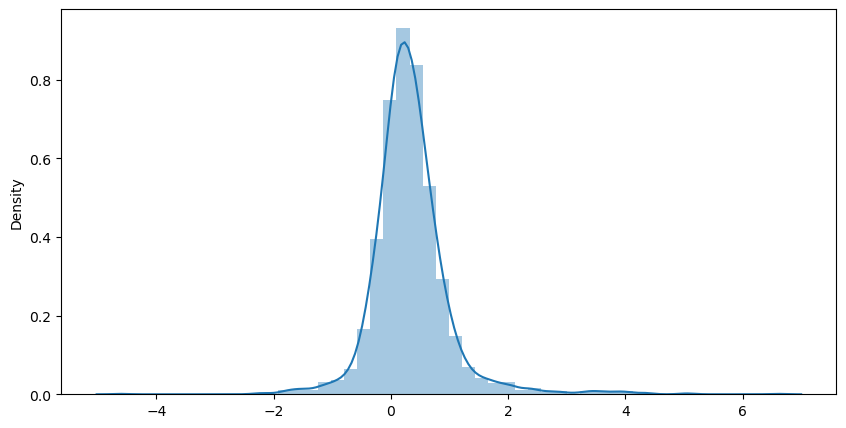

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
residuals = (y_test- result)
sns.distplot(residuals)

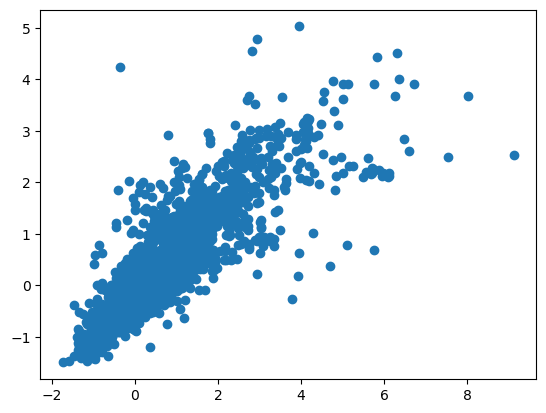

In [23]:
plt.scatter(y_test, result)
plt.plot([0,1],[0,1])

In [24]:
data1 = pd.DataFrame({'origin':y_test * std['y'] + mean['y'],'predict':result* std['y'] + mean['y'],
                     'residual':(y_test * std['y'] + mean['y']) - (result* std['y'] + mean['y'])})
percentage_error = np.mean(np.abs(data1['origin'] - data1['predict'])) / np.mean(data1['origin']) * 100
data1['residual_abs'] = data1['residual'].abs()
data1['y10'] = data1['origin'] / 10 - data1['residual_abs']
data1['y20'] = data1['origin'] / 5 - data1['residual_abs']
data1['y30'] = data1['origin'] / 3.333 - data1['residual_abs']
data1.loc[data1['y10'] >= 0, 'y10'] = 1
data1.loc[data1['y10'] < 0 , 'y10'] = 0
data1.loc[data1['y20'] >= 0, 'y20'] = 1
data1.loc[data1['y20'] < 0 , 'y20'] = 0
data1.loc[data1['y30'] >= 0, 'y30'] = 1
data1.loc[data1['y30'] < 0 , 'y30'] = 0
print(data1)
print(f'預測房價落在實際房價+-10%內的機率為:{data1["y10"].mean()}')
print(f'預測房價落在實際房價+-20%內的機率為:{data1["y20"].mean()}')
print(f'預測房價落在實際房價+-30%內的機率為:{data1["y30"].mean()}')
print("Model Percentage Error: {:.2f}%".format(percentage_error))

        origin        predict       residual   residual_abs  y10  y20  y30
0     175767.0  209565.288496  -33798.288496   33798.288496  0.0  1.0  1.0
1     213653.0  203642.114571   10010.885429   10010.885429  1.0  1.0  1.0
2     213391.0  201771.281646   11619.718354   11619.718354  1.0  1.0  1.0
3     177250.0  220959.205019  -43709.205019   43709.205019  0.0  0.0  1.0
4     394850.0  270786.479394  124063.520606  124063.520606  0.0  0.0  0.0
...        ...            ...            ...            ...  ...  ...  ...
2660  142844.0  123701.398286   19142.601714   19142.601714  0.0  1.0  1.0
2661  139688.0  150346.166237  -10658.166237   10658.166237  1.0  1.0  1.0
2662  156378.0  133171.218739   23206.781261   23206.781261  0.0  1.0  1.0
2663  172746.0  145922.093393   26823.906607   26823.906607  0.0  1.0  1.0
2664  143971.0  147708.624898   -3737.624898    3737.624898  1.0  1.0  1.0

[2665 rows x 7 columns]
預測房價落在實際房價+-10%內的機率為:0.42176360225140713
預測房價落在實際房價+-20%內的機率為:0.78048780487

In [25]:
data1.corr()

,origin,predict,residual,residual_abs,y10,y20,y30
origin,1.000000,0.847379,0.642418,0.658525,-0.178933,-0.236724,-0.274116
predict,0.847379,1.000000,0.137445,0.371570,-0.002078,-0.062257,-0.150085
residual,0.642418,0.137445,1.000000,0.692144,-0.330783,-0.351733,-0.294726
residual_abs,0.658525,0.371570,0.692144,1.000000,-0.531231,-0.641747,-0.663993
y10,-0.178933,-0.002078,-0.330783,-0.531231,1.000000,0.452927,0.220823
y20,-0.236724,-0.062257,-0.351733,-0.641747,0.452927,1.000000,0.487546
y30,-0.274116,-0.150085,-0.294726,-0.663993,0.220823,0.487546,1.000000


In [26]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
print(f"mean_absolute_error: {mean_absolute_error(y_test, result)}")
print(f"mean_absolute_percentage_error: {mean_absolute_percentage_error(y_test, result)}")
print(f"mean_squared_error: {mean_squared_error(y_test, result)}")
print(f"explained_variance_score: {explained_variance_score(y_test, result)}")
print(f"r2_score: {r2_score(y_test, result)}")
print(f"r2_adj_score: {1 - (1 - r2_score(y_test, result)) * (feature_count - 1) / (df.shape[0] - feature_count - 1)}")

mean_absolute_error: 0.4977204606954926
mean_absolute_percentage_error: 4.411615303929645
mean_squared_error: 0.5549681533533716
explained_variance_score: 0.712621974634007
r2_score: 0.641328733658249
r2_adj_score: 0.9833700552344493
